# Generated tSNE on PCA Output

The original dataset has large number of features (115) for most ML model to handle. Hence, PCA was used to compressed the data to 10 features. tSNE was then used to visualise the result to identify any cluster hidden in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', 500)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# import all benign data

device1 = pd.read_csv("1.benign.csv")
device1['Device'] = 1
device1_device = device1['Device']
device1 = device1.drop(['Device'], axis=1)

device2 = pd.read_csv("2.benign.csv")
device2['Device'] = 2
device2_device = device2['Device']
device2 = device2.drop(['Device'], axis=1)

device3 = pd.read_csv("3.benign.csv")
device3['Device'] = 3
device3_device = device3['Device']
device3 = device3.drop(['Device'], axis=1)

device4 = pd.read_csv("4.benign.csv")
device4['Device'] = 4
device4_device = device4['Device']
device4 = device4.drop(['Device'], axis=1)

device5 = pd.read_csv("5.benign.csv")
device5['Device'] = 5
device5_device = device5['Device']
device5 = device5.drop(['Device'], axis=1)

device6 = pd.read_csv("6.benign.csv")
device6['Device'] = 6
device6_device = device6['Device']
device6 = device6.drop(['Device'], axis=1)

device7 = pd.read_csv("7.benign.csv")
device7['Device'] = 7
device7_device = device7['Device']
device7 = device7.drop(['Device'], axis=1)

device8 = pd.read_csv("8.benign.csv")
device8['Device'] = 8
device8_device = device8['Device']
device8 = device8.drop(['Device'], axis=1)

all_benign = device1.append([device2,device3,device4,device5,device6,device7,device8])
labels = device1_device.append([device2_device,device3_device,device4_device,device5_device,device6_device,device7_device,device8_device])

scaler = StandardScaler()
scaler.fit(all_benign)
all_benign = scaler.transform(all_benign)

PCA model was used to reduce the dimension to 10 features

In [3]:
pca=PCA(n_components=10) 
pca.fit(all_benign) 
all_benign=pca.transform(all_benign)
all_benign = pd.DataFrame(all_benign)

In [4]:
#combine the compressed data with the label data
x_data =all_benign
y_data = labels.values
x_data['label'] = y_data

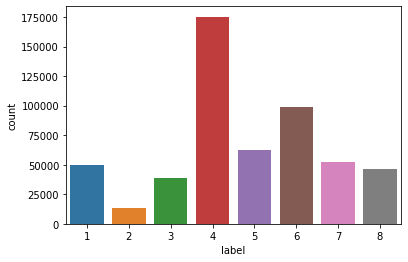

In [5]:
sns.countplot(x_data['label'])

The above plot showed that the dataset was imbalanced. Hence, downsampling was implemented.

In [6]:
label_1 = x_data[x_data['label'] == 1]
label_1 = label_1.sample(10000, random_state=42)

label_2 = x_data[x_data['label'] == 2]
label_2 = label_2.sample(10000, random_state=42)

label_3 = x_data[x_data['label'] == 3]
label_3 = label_3.sample(10000, random_state=42)

label_4 = x_data[x_data['label'] == 4]
label_4 = label_4.sample(10000, random_state=42)

label_5 = x_data[x_data['label'] == 5]
label_5 = label_5.sample(10000, random_state=42)

label_6 = x_data[x_data['label'] == 6]
label_6 = label_6.sample(10000, random_state=42)

label_7 = x_data[x_data['label'] == 7]
label_7 = label_7.sample(10000, random_state=42)

label_8 = x_data[x_data['label'] == 8]
label_8 = label_8.sample(10000, random_state=42)

x_data = pd.concat([label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8])

In [7]:
## prepare the data for tSNE plot
x_data = np.asarray(x_data)
x_data_Y = x_data[:,x_data.shape[1]-1]
x_data_Y = np.asarray(x_data_Y)
x_data_X = x_data[:,0:x_data.shape[1]-1]
x_data_X = np.asarray(x_data_X)

tSNE was used to visualise the PCA result

perplexity =  800
num iter 1200
learning rate 100
num iter processed 1200


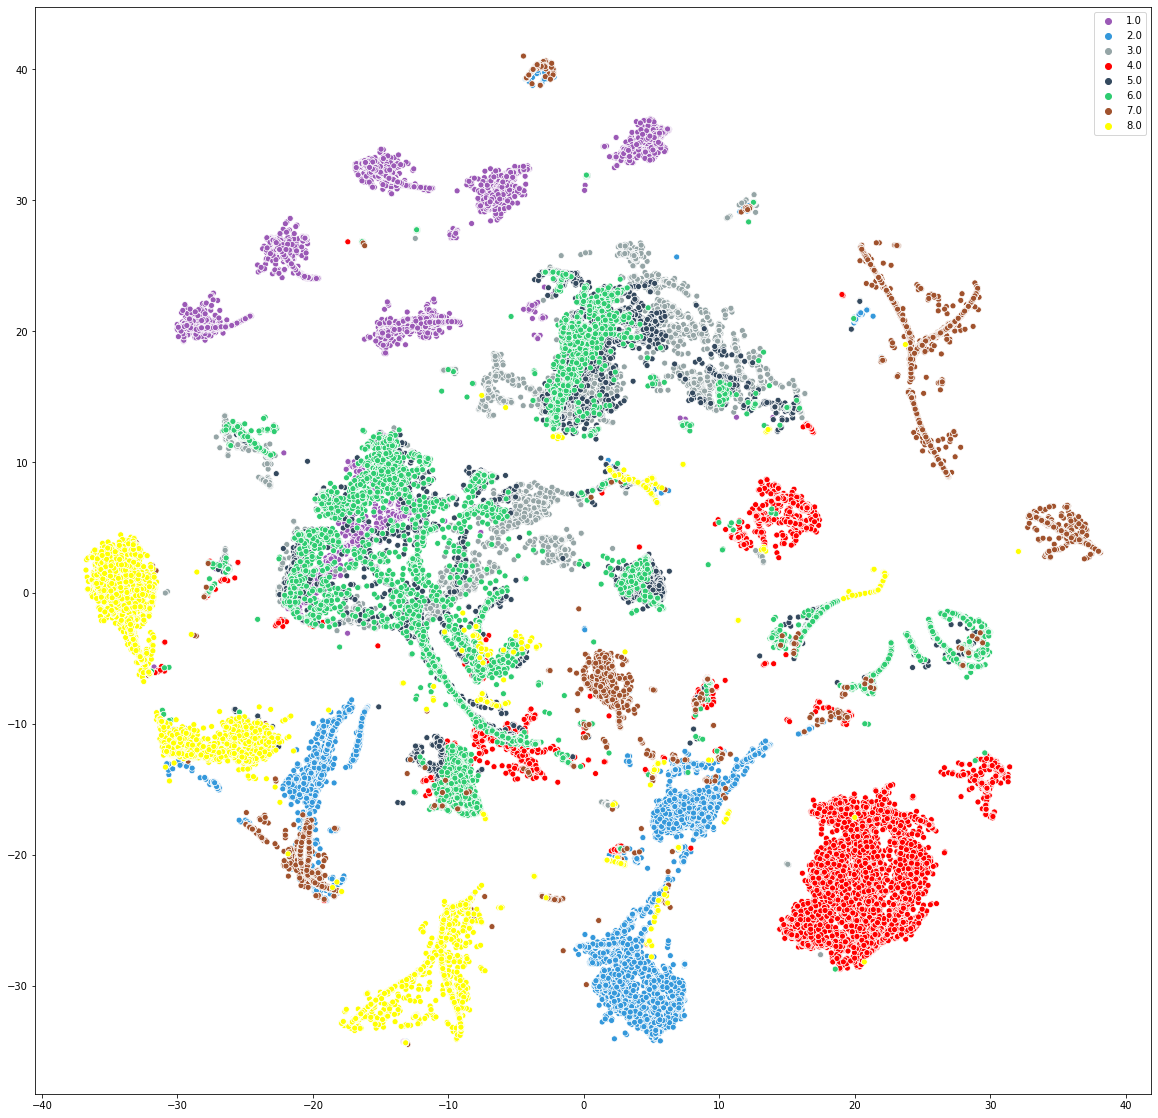

In [8]:
perplexity = [800]
n_iter = [1200]
learning_rate = [100]

for perplexity_value in (perplexity):
    for n_iter_value in (n_iter):
        for learning_rate_value in (learning_rate):
            
            print("perplexity = ", perplexity_value)
            print("num iter", n_iter_value)
            print("learning rate", learning_rate_value)
            
            tsne = TSNE(perplexity = perplexity_value, n_iter = n_iter_value, learning_rate = learning_rate_value, n_iter_without_progress = 50)
            X_embedded = tsne.fit_transform(x_data_X)
            print("num iter processed", tsne.n_iter)
            
                        
            plt.figure(figsize=(20,20))
            CL = ["#9b59b6", "#3498db", "#95a5a6", "red", "#34495e", "#2ecc71", 'sienna', 'yellow']
            sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=x_data_Y, legend='full',palette = sns.color_palette(CL, 8))
            plt.show()